In [9]:
dados_clinicos <- read.csv("Dados_clinicos.csv", sep=";", dec=",", header=TRUE)


In [10]:
dados_clinicos


Case..,DN,SEXO,TC.PRÉ.TTO,CEA..mcg.L..QUANTITATIVO.,CEA,DOENÇA.METASTÁTICA.NO.DIAGNÓSTICO,LOCALIZAÇÃO.DA.DOENÇA.NO.COLON,LOCALIZAÇÃO.DAS.METÁSTASES,METÁSTASES.HEPÁTICA,METÁSTASES.PERITONEAIS,METÁSTASES.PULMONARES,METÁSTASES.EM.OUTROS.LOCAIS,TAMANHO.TUMOR..em.cm.,TIPO.DE.CONTRASTAÇÃO,CONTEÚDO.MUCINOSO,INVASÃO.VENOSA.EXTRAMURAL,LINFONODOS.LOCORREGIONAIS
6,20/04/1964,F,06/10/2016,13.0,1,0,5,,0,0,0,0,4.5,1,1,1,1
7,20/09/1937,M,15/06/2016,2.6,0,1,6,1,1,0,0,0,5.6,1,1,1,1
23,17/12/1931,F,16/03/2017,89.0,1,1,4,1,1,0,0,0,5.0,0,1,1,0
31,13/04/1953,F,21/07/2016,14.0,1,1,4,1,1,0,0,0,4.6,0,0,1,1
32,07/06/1976,F,19/11/2015,8.7,1,0,9,,0,0,0,0,4.5,0,0,0,1
37,28/05/1947,M,01/08/2016,8.1,1,0,10,,0,0,0,0,7.5,1,2,1,1
49,02/12/1966,F,24/04/2017,1.3,0,0,4,,0,0,0,0,3.6,0,1,0,1
51,20/02/1968,M,05/03/2016,25.0,1,1,1,1,1,0,0,0,4.6,1,2,1,1
73,04/05/1959,M,17/02/2014,2.0,1,0,4,,0,0,0,0,5.0,0,0,1,1
76,14/02/1966,M,15/08/2016,20.0,1,1,6,1+3+4 (osso),1,0,1,1,7.6,1,1,1,1


In [11]:
library(fastDummies)
local_meta_dummies<-dummy_cols(as.factor(dados_clinicos$LOCALIZAÇÃO.DAS.METÁSTASES))

In [12]:
(local_meta_dummies)

.data,.data_,.data_1,.data_1+3+4 (osso),.data_3,.data_1+3+4 (estômago),.data_2,.data_1+3,.data_1+2+4
,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
,1,0,0,0,0,0,0,0
,1,0,0,0,0,0,0,0
,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
,1,0,0,0,0,0,0,0
1+3+4 (osso),0,0,1,0,0,0,0,0


In [13]:
local_meta_dummies1<-local_meta_dummies
local_meta_dummies1$.data_1<-rowSums(local_meta_dummies[,c(3,4, 6, 8, 9)])
local_meta_dummies1$.data_2<-rowSums(local_meta_dummies[,c(7,9)])
local_meta_dummies1$.data_3<-rowSums(local_meta_dummies[,c(4, 5, 6, 8)])
local_meta_dummies1$.data_4<-rowSums(local_meta_dummies[,c(4, 6, 9)])
names(local_meta_dummies1)[4]<-".data_1_2_4_osso"
names(local_meta_dummies1)[6]<-".data_1_3_4_estoamgo"
names(local_meta_dummies1)[8]<-".data_1_3"
names(local_meta_dummies1)[9]<-".data_1_2_4"
local_meta_dummies1$.data_1_2_4_osso<-NULL
local_meta_dummies1$.data_1_3_4_estoamgo<-NULL
local_meta_dummies1$.data_1_3<-NULL
local_meta_dummies1$.data_1_2_4<-NULL
names(local_meta_dummies1)[2]<-"sem_metástase"
names(local_meta_dummies1)[3]<-"fígado"
names(local_meta_dummies1)[1]<-"localização das metástases"
names(local_meta_dummies1)[4]<-"pulmão"
names(local_meta_dummies1)[5]<-"peritônio"
names(local_meta_dummies1)[6]<-"outros"
local_meta_dummies1$sem_metástase<-NULL
local_meta_dummies1


localização das metástases,fígado,pulmão,peritônio,outros
,0,0,0,0
1,1,0,0,0
1,1,0,0,0
1,1,0,0,0
,0,0,0,0
,0,0,0,0
,0,0,0,0
1,1,0,0,0
,0,0,0,0
1+3+4 (osso),1,1,0,1


In [14]:
dados_clinicos$LOCALIZAÇÃO.DAS.METÁSTASES<-NULL
dados_clinicos

Case..,DN,SEXO,TC.PRÉ.TTO,CEA..mcg.L..QUANTITATIVO.,CEA,DOENÇA.METASTÁTICA.NO.DIAGNÓSTICO,LOCALIZAÇÃO.DA.DOENÇA.NO.COLON,METÁSTASES.HEPÁTICA,METÁSTASES.PERITONEAIS,METÁSTASES.PULMONARES,METÁSTASES.EM.OUTROS.LOCAIS,TAMANHO.TUMOR..em.cm.,TIPO.DE.CONTRASTAÇÃO,CONTEÚDO.MUCINOSO,INVASÃO.VENOSA.EXTRAMURAL,LINFONODOS.LOCORREGIONAIS
6,20/04/1964,F,06/10/2016,13.0,1,0,5,0,0,0,0,4.5,1,1,1,1
7,20/09/1937,M,15/06/2016,2.6,0,1,6,1,0,0,0,5.6,1,1,1,1
23,17/12/1931,F,16/03/2017,89.0,1,1,4,1,0,0,0,5.0,0,1,1,0
31,13/04/1953,F,21/07/2016,14.0,1,1,4,1,0,0,0,4.6,0,0,1,1
32,07/06/1976,F,19/11/2015,8.7,1,0,9,0,0,0,0,4.5,0,0,0,1
37,28/05/1947,M,01/08/2016,8.1,1,0,10,0,0,0,0,7.5,1,2,1,1
49,02/12/1966,F,24/04/2017,1.3,0,0,4,0,0,0,0,3.6,0,1,0,1
51,20/02/1968,M,05/03/2016,25.0,1,1,1,1,0,0,0,4.6,1,2,1,1
73,04/05/1959,M,17/02/2014,2.0,1,0,4,0,0,0,0,5.0,0,0,1,1
76,14/02/1966,M,15/08/2016,20.0,1,1,6,1,0,1,1,7.6,1,1,1,1


In [15]:

table(dados_clinicos$SEXO)
table(dados_clinicos$DOENÇA.METASTÁTICA.NO.DIAGNÓSTICO)


 F  M 
11 12 


 0  1 
10 13 

In [16]:
Sexo<-dummy_cols(dados_clinicos$SEXO)
Sexo$.data<-NULL
Sexo

.data_F,.data_M
1,0
0,1
1,0
1,0
1,0
0,1
1,0
0,1
0,1
0,1


In [17]:
dados_clinicos$F<-Sexo$.data_F
dados_clinicos$M<-Sexo$.data_M
dados_clinicos$SEXO<-NULL
dados_clinicos

Case..,DN,TC.PRÉ.TTO,CEA..mcg.L..QUANTITATIVO.,CEA,DOENÇA.METASTÁTICA.NO.DIAGNÓSTICO,LOCALIZAÇÃO.DA.DOENÇA.NO.COLON,METÁSTASES.HEPÁTICA,METÁSTASES.PERITONEAIS,METÁSTASES.PULMONARES,METÁSTASES.EM.OUTROS.LOCAIS,TAMANHO.TUMOR..em.cm.,TIPO.DE.CONTRASTAÇÃO,CONTEÚDO.MUCINOSO,INVASÃO.VENOSA.EXTRAMURAL,LINFONODOS.LOCORREGIONAIS,F,M
6,20/04/1964,06/10/2016,13.0,1,0,5,0,0,0,0,4.5,1,1,1,1,1,0
7,20/09/1937,15/06/2016,2.6,0,1,6,1,0,0,0,5.6,1,1,1,1,0,1
23,17/12/1931,16/03/2017,89.0,1,1,4,1,0,0,0,5.0,0,1,1,0,1,0
31,13/04/1953,21/07/2016,14.0,1,1,4,1,0,0,0,4.6,0,0,1,1,1,0
32,07/06/1976,19/11/2015,8.7,1,0,9,0,0,0,0,4.5,0,0,0,1,1,0
37,28/05/1947,01/08/2016,8.1,1,0,10,0,0,0,0,7.5,1,2,1,1,0,1
49,02/12/1966,24/04/2017,1.3,0,0,4,0,0,0,0,3.6,0,1,0,1,1,0
51,20/02/1968,05/03/2016,25.0,1,1,1,1,0,0,0,4.6,1,2,1,1,0,1
73,04/05/1959,17/02/2014,2.0,1,0,4,0,0,0,0,5.0,0,0,1,1,0,1
76,14/02/1966,15/08/2016,20.0,1,1,6,1,0,1,1,7.6,1,1,1,1,0,1


In [18]:
dts <- dados_clinicos$DN
dates<-as.Date(dts, "%d/%m/%Y")
dates

[1] "1964-04-20" "1937-09-20" "1931-12-17" "1953-04-13" "1976-06-07"
 [6] "1947-05-28" "1966-12-02" "1968-02-20" "1959-05-04" "1966-02-14"
[11] "1955-07-10" "1953-07-14" "1980-02-05" "1955-12-22" "1982-10-19"
[16] "1981-01-15" "1945-12-19" "1949-06-27" "1948-07-21" "1948-07-13"
[21] "1961-05-17" "1948-02-13" "1939-05-19"

In [19]:
options(repos = c(
  CRAN = 'https://cran.rstudio.com',
  CRANextra = 'https://macos.rbind.io'
))

In [20]:
dados_geneticos <- read.csv("Dados_genéticos.csv", sep=";", dec=",", header=TRUE)



In [21]:
dados_geneticos

Case..,DN,SEXO,TC.PRÉ.TTO,CEA..mcg.L..QUANTITATIVO.,CEA,DOENÇA.METASTÁTICA.NO.DIAGNÓSTICO,LOCALIZAÇÃO.DA.DOENÇA.NO.COLON,LOCALIZAÇÃO.DAS.METÁSTASES,DATA.DO.MSI,⋯,DATA.DO.NGS,SITIO.DO.NGS,AKT1,BRAF,KRAS,NRAS,PIK3CA,PTEN,X,X.1
6,20/04/1964,F,06/10/2016,13,1,0,5,-,14/03/2017,⋯,14/03/2017,1,0,0,1,0,0,0,,NA
7,20/09/1937,M,15/06/2016,"2,6",0,1,6,1,24/06/2016,⋯,24/06/2016,1,0,0,0,0,0,0,,NA
23,17/12/1931,F,16/03/2017,89,1,1,4,1,23/03/2017,⋯,18/09/2017,1,0,0,1,0,1,0,,NA
31,13/04/1953,F,21/07/2016,14,1,1,4,1,26/07/2016,⋯,26/07/2016,0,0,0,0,0,0,0,,NA
32,07/06/1976,F,19/11/2015,"8,7",1,0,2+3,-,21/11/2015,⋯,16/10/2017,0,0,0,1,0,0,0,,NA
37,28/05/1947,M,01/08/2016,"8,1",1,0,1(a+b),-,08/08/2016,⋯,08/08/2016,1,0,0,0,0,1,1,,NA
49,02/12/1966,F,24/04/2017,"1,3",0,0,4,-,02/05/2017,⋯,22/01/2018,0,0,0,0,0,0,0,,NA
51,20/02/1968,M,05/03/2016,25,1,1,1b,1,15/03/2016,⋯,15/03/2016,1,0,0,0,0,0,0,,NA
73,04/05/1959,M,17/02/2014,2,1,0,4,-,?,⋯,07/03/2014,1,0,0,0,0,0,0,,NA
76,14/02/1966,M,15/08/2016,20,1,1,6,1+3+4 (osso),18/08/2016,⋯,19/08/2016,2,0,0,1,0,0,0,,NA


In [22]:
dados_clinicos$KRAS <- dados_geneticos$KRAS

In [23]:
dados_clinicos

Case..,DN,TC.PRÉ.TTO,CEA..mcg.L..QUANTITATIVO.,CEA,DOENÇA.METASTÁTICA.NO.DIAGNÓSTICO,LOCALIZAÇÃO.DA.DOENÇA.NO.COLON,METÁSTASES.HEPÁTICA,METÁSTASES.PERITONEAIS,METÁSTASES.PULMONARES,METÁSTASES.EM.OUTROS.LOCAIS,TAMANHO.TUMOR..em.cm.,TIPO.DE.CONTRASTAÇÃO,CONTEÚDO.MUCINOSO,INVASÃO.VENOSA.EXTRAMURAL,LINFONODOS.LOCORREGIONAIS,F,M,KRAS
6,20/04/1964,06/10/2016,13.0,1,0,5,0,0,0,0,4.5,1,1,1,1,1,0,1
7,20/09/1937,15/06/2016,2.6,0,1,6,1,0,0,0,5.6,1,1,1,1,0,1,0
23,17/12/1931,16/03/2017,89.0,1,1,4,1,0,0,0,5.0,0,1,1,0,1,0,1
31,13/04/1953,21/07/2016,14.0,1,1,4,1,0,0,0,4.6,0,0,1,1,1,0,0
32,07/06/1976,19/11/2015,8.7,1,0,9,0,0,0,0,4.5,0,0,0,1,1,0,1
37,28/05/1947,01/08/2016,8.1,1,0,10,0,0,0,0,7.5,1,2,1,1,0,1,0
49,02/12/1966,24/04/2017,1.3,0,0,4,0,0,0,0,3.6,0,1,0,1,1,0,0
51,20/02/1968,05/03/2016,25.0,1,1,1,1,0,0,0,4.6,1,2,1,1,0,1,0
73,04/05/1959,17/02/2014,2.0,1,0,4,0,0,0,0,5.0,0,0,1,1,0,1,0
76,14/02/1966,15/08/2016,20.0,1,1,6,1,0,1,1,7.6,1,1,1,1,0,1,1


In [24]:
dados_clinicos$DN <- dates
dados_clinicos

Case..,DN,TC.PRÉ.TTO,CEA..mcg.L..QUANTITATIVO.,CEA,DOENÇA.METASTÁTICA.NO.DIAGNÓSTICO,LOCALIZAÇÃO.DA.DOENÇA.NO.COLON,METÁSTASES.HEPÁTICA,METÁSTASES.PERITONEAIS,METÁSTASES.PULMONARES,METÁSTASES.EM.OUTROS.LOCAIS,TAMANHO.TUMOR..em.cm.,TIPO.DE.CONTRASTAÇÃO,CONTEÚDO.MUCINOSO,INVASÃO.VENOSA.EXTRAMURAL,LINFONODOS.LOCORREGIONAIS,F,M,KRAS
6,1964-04-20,06/10/2016,13.0,1,0,5,0,0,0,0,4.5,1,1,1,1,1,0,1
7,1937-09-20,15/06/2016,2.6,0,1,6,1,0,0,0,5.6,1,1,1,1,0,1,0
23,1931-12-17,16/03/2017,89.0,1,1,4,1,0,0,0,5.0,0,1,1,0,1,0,1
31,1953-04-13,21/07/2016,14.0,1,1,4,1,0,0,0,4.6,0,0,1,1,1,0,0
32,1976-06-07,19/11/2015,8.7,1,0,9,0,0,0,0,4.5,0,0,0,1,1,0,1
37,1947-05-28,01/08/2016,8.1,1,0,10,0,0,0,0,7.5,1,2,1,1,0,1,0
49,1966-12-02,24/04/2017,1.3,0,0,4,0,0,0,0,3.6,0,1,0,1,1,0,0
51,1968-02-20,05/03/2016,25.0,1,1,1,1,0,0,0,4.6,1,2,1,1,0,1,0
73,1959-05-04,17/02/2014,2.0,1,0,4,0,0,0,0,5.0,0,0,1,1,0,1,0
76,1966-02-14,15/08/2016,20.0,1,1,6,1,0,1,1,7.6,1,1,1,1,0,1,1


In [25]:
dados_clinicos$TC.PRÉ.TTO <- NULL
dados_clinicos

Case..,DN,CEA..mcg.L..QUANTITATIVO.,CEA,DOENÇA.METASTÁTICA.NO.DIAGNÓSTICO,LOCALIZAÇÃO.DA.DOENÇA.NO.COLON,METÁSTASES.HEPÁTICA,METÁSTASES.PERITONEAIS,METÁSTASES.PULMONARES,METÁSTASES.EM.OUTROS.LOCAIS,TAMANHO.TUMOR..em.cm.,TIPO.DE.CONTRASTAÇÃO,CONTEÚDO.MUCINOSO,INVASÃO.VENOSA.EXTRAMURAL,LINFONODOS.LOCORREGIONAIS,F,M,KRAS
6,1964-04-20,13.0,1,0,5,0,0,0,0,4.5,1,1,1,1,1,0,1
7,1937-09-20,2.6,0,1,6,1,0,0,0,5.6,1,1,1,1,0,1,0
23,1931-12-17,89.0,1,1,4,1,0,0,0,5.0,0,1,1,0,1,0,1
31,1953-04-13,14.0,1,1,4,1,0,0,0,4.6,0,0,1,1,1,0,0
32,1976-06-07,8.7,1,0,9,0,0,0,0,4.5,0,0,0,1,1,0,1
37,1947-05-28,8.1,1,0,10,0,0,0,0,7.5,1,2,1,1,0,1,0
49,1966-12-02,1.3,0,0,4,0,0,0,0,3.6,0,1,0,1,1,0,0
51,1968-02-20,25.0,1,1,1,1,0,0,0,4.6,1,2,1,1,0,1,0
73,1959-05-04,2.0,1,0,4,0,0,0,0,5.0,0,0,1,1,0,1,0
76,1966-02-14,20.0,1,1,6,1,0,1,1,7.6,1,1,1,1,0,1,1


In [1]:
#install.packages('xlsx')

Warning message in install.packages("xlsx"):
“installation of package ‘xlsx’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [1]:
library("xlsx")

In [2]:
#install.packages('ggplot2')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
library("ggplot2")

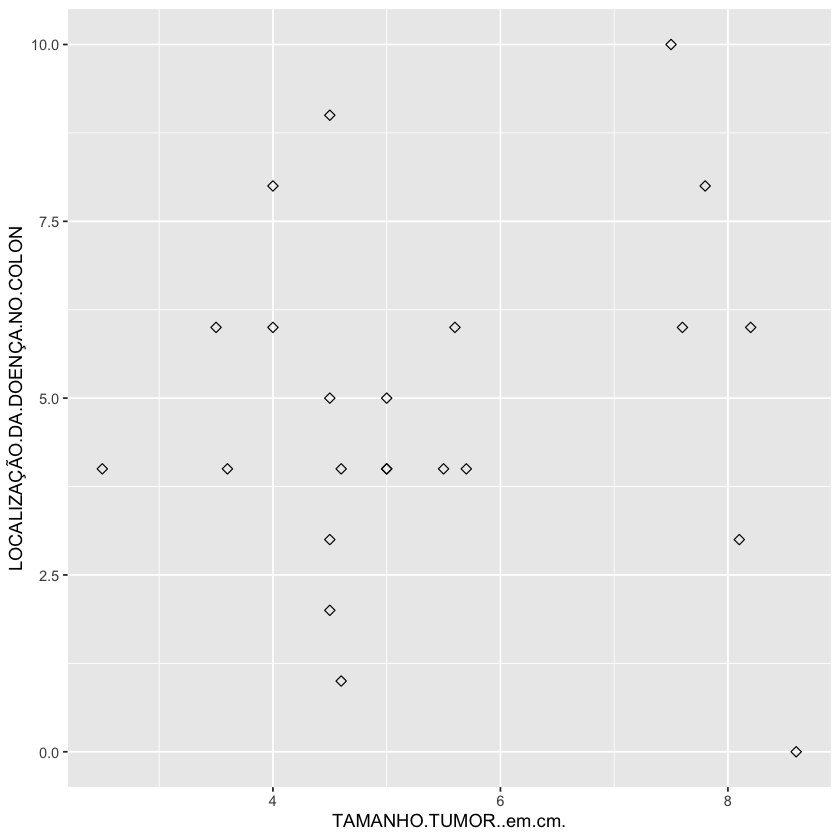

In [29]:
ggplot(dados_clinicos, aes(x=TAMANHO.TUMOR..em.cm., y=LOCALIZAÇÃO.DA.DOENÇA.NO.COLON)) +
  geom_point(size=2, shape=23)